In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Cargamos la data
file_path = 'Retail_Invoices (1).xlsx'
data = pd.read_excel(file_path)


data.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [2]:

data.sort_values('Quantity', ascending=False).head(10)


,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
18503,581483,2011-12-09,16446,80995,168469.60,1
1909,541431,2011-01-18,12346,74215,77183.60,1
8112,556917,2011-06-15,12415,15049,22775.93,138
10612,563076,2011-08-11,14646,14730,19150.66,119
14371,572035,2011-10-20,14646,13392,20277.92,125
12419,567423,2011-09-20,17450,12572,31698.16,12
17360,578841,2011-11-25,13256,12540,0.00,1
6437,552883,2011-05-12,14646,12266,14415.74,92
10843,563614,2011-08-18,12415,12196,21880.44,97
10344,562439,2011-08-04,12931,11848,18841.48,22


In [3]:
# Valores Faltantes, Anomalias, duplicados.
quality_report = {
    "missing_values": data.isnull().sum(),
    "data_types": data.dtypes,
    "duplicate_rows": data.duplicated().sum(),
    "summary_statistics": data.describe()
}

quality_report


{'missing_values': InvoiceNo      0
 InvoiceDate    0
 CustomerID     0
 Quantity       0
 price_total    0
 StockCode      0
 dtype: int64,
 'data_types': InvoiceNo              object
 InvoiceDate    datetime64[ns]
 CustomerID              int64
 Quantity                int64
 price_total           float64
 StockCode               int64
 dtype: object,
 'duplicate_rows': 0,
 'summary_statistics':                          InvoiceDate    CustomerID      Quantity  \
 count                          22190  22190.000000  22190.000000   
 mean   2011-06-29 05:59:15.223073536  15238.498738    221.130599   
 min              2010-12-01 00:00:00  12346.000000 -80995.000000   
 25%              2011-03-29 00:00:00  13755.000000     30.000000   
 50%              2011-07-08 00:00:00  15136.000000    120.000000   
 75%              2011-10-10 00:00:00  16746.000000    254.000000   
 max              2011-12-09 00:00:00  18287.000000  80995.000000   
 std                              NaN   1733.14

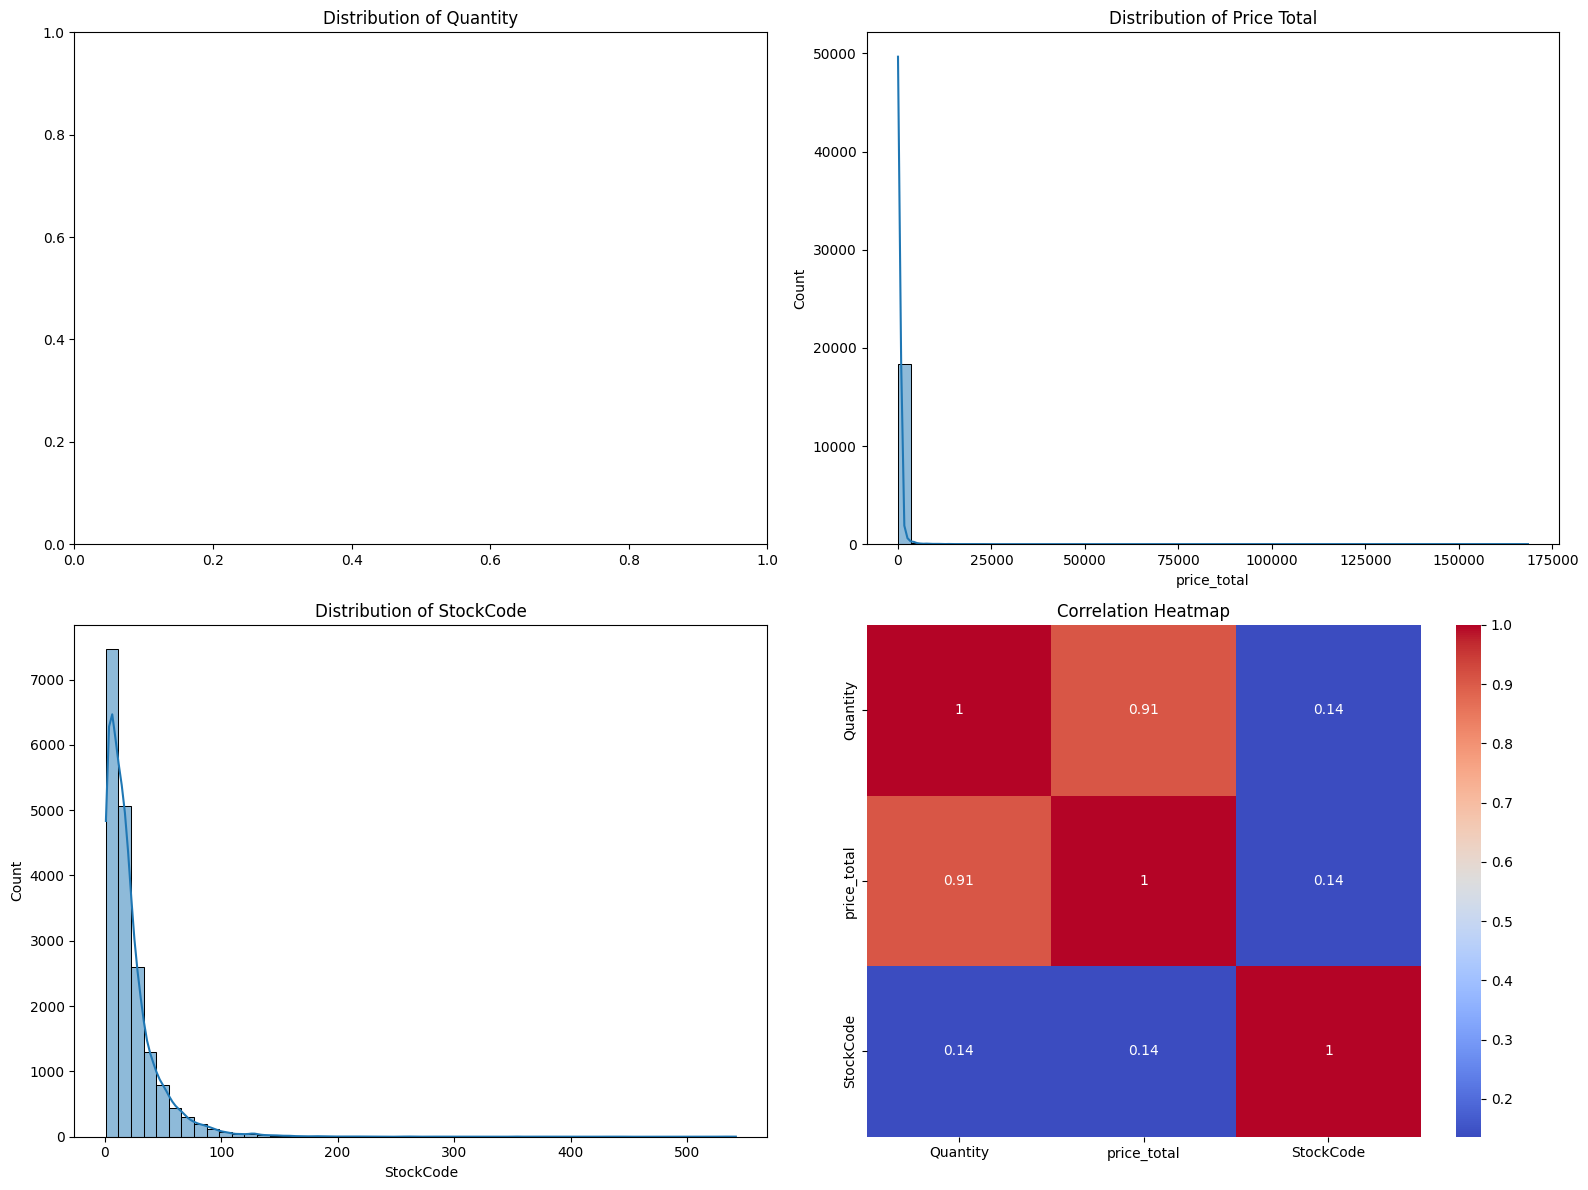

In [4]:


# Eliminacion de valores negativos

cleaned_data = data[(data['Quantity'] > 0) & (data['price_total'] > 0)]

# Exploratory Data Analysis (EDA) con visualizaciones
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Distribution of Distribucion de .histplot(cleaned_data['Quantity'], bins=50, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribution of Quantity')

# Distribucion de price_total
sns.histplot(cleaned_data['price_total'], bins=50, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribution of Price Total')

# Distribucion de StockCode
sns.histplot(cleaned_data['StockCode'], bins=50, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribution of StockCode')

# Heatmapo de correlaciones
corr = cleaned_data[['Quantity', 'price_total', 'StockCode']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Correlation Heatmap')

plt.tight_layout()
plt.show()


In [5]:

data.sort_values('Quantity', ascending=False).head(10)

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
18503,581483,2011-12-09,16446,80995,168469.60,1
1909,541431,2011-01-18,12346,74215,77183.60,1
8112,556917,2011-06-15,12415,15049,22775.93,138
10612,563076,2011-08-11,14646,14730,19150.66,119
14371,572035,2011-10-20,14646,13392,20277.92,125
12419,567423,2011-09-20,17450,12572,31698.16,12
17360,578841,2011-11-25,13256,12540,0.00,1
6437,552883,2011-05-12,14646,12266,14415.74,92
10843,563614,2011-08-18,12415,12196,21880.44,97
10344,562439,2011-08-04,12931,11848,18841.48,22


Distribución de Quantity: La distribución de la cantidad de productos comprados muestra una concentración en valores más bajos, lo que indica que la mayoría de las compras consisten en cantidades pequeñas. Hay una cola larga hacia la derecha, sugiriendo que hay algunas compras con cantidades significativamente más altas, aunque son menos frecuentes.


Distribución de price_total: Similar a Quantity, la distribución del precio total de las boletas también está sesgada hacia la derecha, con la mayoría de las compras concentradas en montos más bajos. Esto es coherente con el patrón típico de gasto en un supermercado, donde hay muchas compras de menor valor y pocas de alto valor


Distribución de StockCode: La cantidad de unidades diferentes compradas en una transacción varía ampliamente, con una concentración en números más bajos. Esto podría indicar que los clientes tienden a comprar una variedad limitada de productos en cada visita.

Mapa de calor de correlación: La correlación entre Quantity, price_total, y StockCode es relativamente baja. Esto sugiere que, aunque hay algunas relaciones lineales entre estas variables, no son fuertemente dependientes unas de otras. La correlación más notable es entre Quantity y price_total, lo cual es de esperar, ya que compras con más artículos tienden a tener un precio total más alto.


 **Una limpieza de datos atipicos puede que influya positivamente en la sensibilidad de algunos metodos que utilizaremos a futuro a valores extremos.**




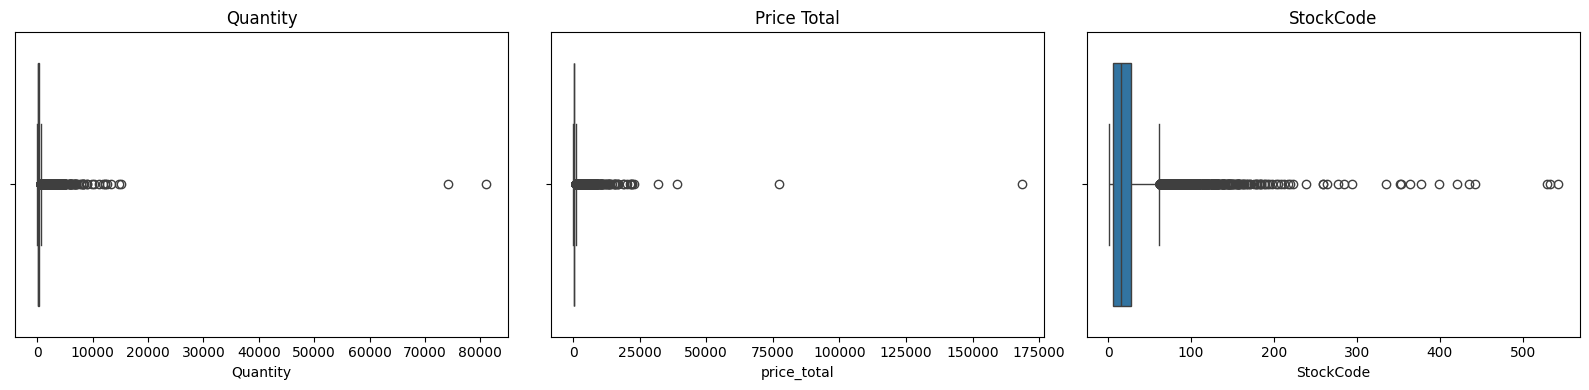

In [6]:

# Visualizacion de outliers con boxplot

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.boxplot(x=cleaned_data['Quantity'], ax=axes[0])
axes[0].set_title('Quantity')

sns.boxplot(x=cleaned_data['price_total'], ax=axes[1])
axes[1].set_title('Price Total')

sns.boxplot(x=cleaned_data['StockCode'], ax=axes[2])
axes[2].set_title('StockCode')

plt.tight_layout()
plt.show()




Efectivamente los datos atipicos son extremos y pueden influir significativamente en los modelos. Se procede a realizar la limppieza de datos

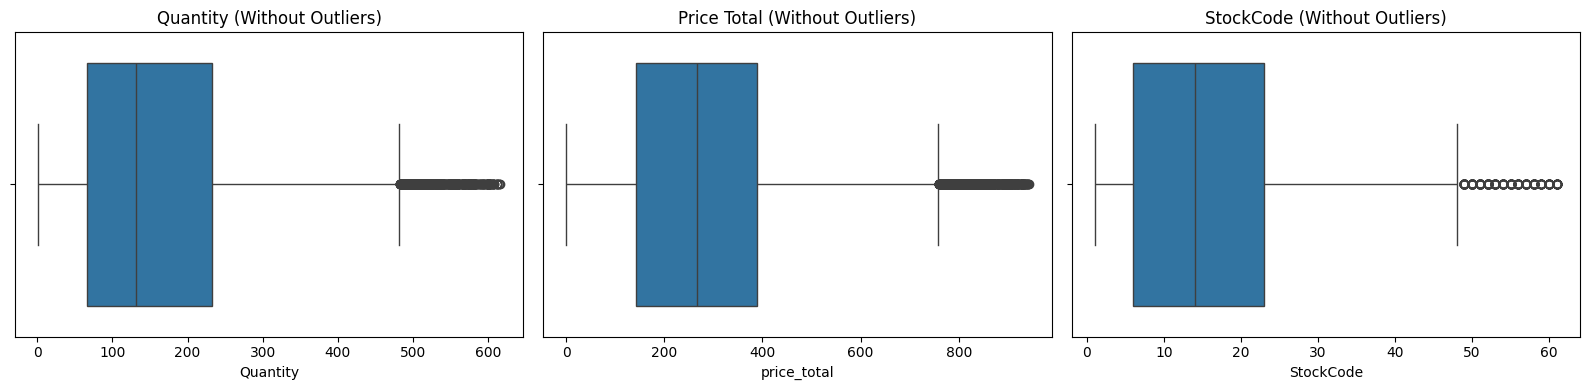

In [7]:
# Removemos outliers mediante el metodo IQR
Q1 = cleaned_data['Quantity'].quantile(0.25)
Q3 = cleaned_data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data_without_outliers = cleaned_data[(cleaned_data['Quantity'] >= lower_bound) & (cleaned_data['Quantity'] <= upper_bound)]

Q1 = cleaned_data['price_total'].quantile(0.25)
Q3 = cleaned_data['price_total'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data_without_outliers = cleaned_data_without_outliers[(cleaned_data_without_outliers['price_total'] >= lower_bound) & (cleaned_data_without_outliers['price_total'] <= upper_bound)]

Q1 = cleaned_data['StockCode'].quantile(0.25)
Q3 = cleaned_data['StockCode'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

cleaned_data_without_outliers = cleaned_data_without_outliers[(cleaned_data_without_outliers['StockCode'] >= lower_bound) & (cleaned_data_without_outliers['StockCode'] <= upper_bound)]

# Visualizacion de datos sin outliers
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.boxplot(x=cleaned_data_without_outliers['Quantity'], ax=axes[0])
axes[0].set_title('Quantity (Without Outliers)')

sns.boxplot(x=cleaned_data_without_outliers['price_total'], ax=axes[1])
axes[1].set_title('Price Total (Without Outliers)')

sns.boxplot(x=cleaned_data_without_outliers['StockCode'], ax=axes[2])
axes[2].set_title('StockCode (Without Outliers)')

plt.tight_layout()
plt.show()


Si bien siguen existiendo valores atipicos, estos son significativamente menores y los datos estan dentro de un rango mas entendible para el modelo


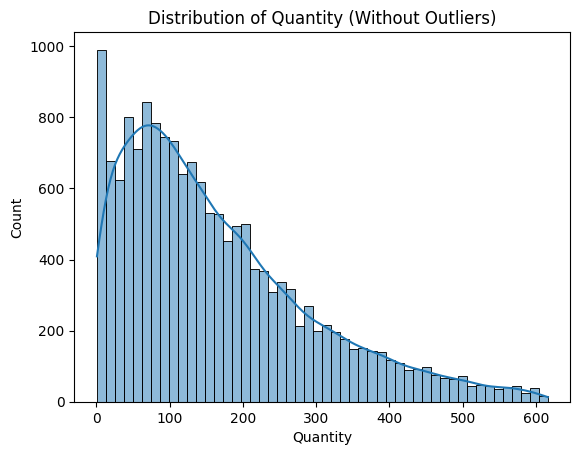

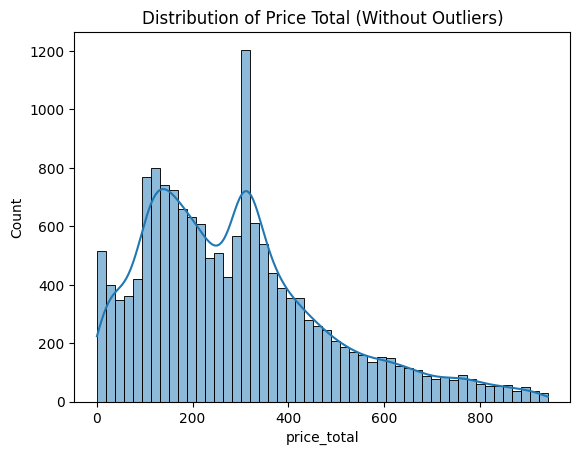

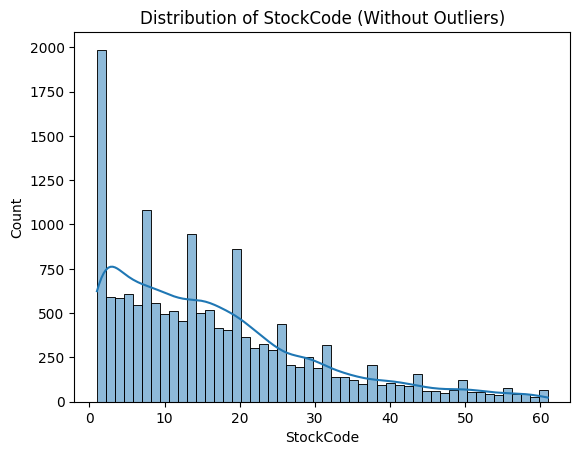

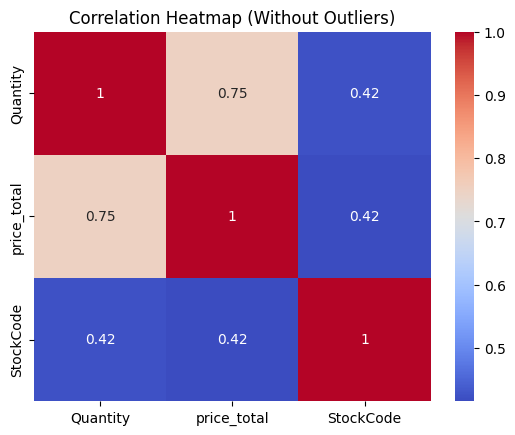

In [8]:
# prompt: Vuelve a generar los graficos de distribucion y correlacion que genere anteriormente

import matplotlib.pyplot as plt
# Distribution of Quantity
sns.histplot(cleaned_data_without_outliers['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity (Without Outliers)')
plt.show()

# Distribution of price_total
sns.histplot(cleaned_data_without_outliers['price_total'], bins=50, kde=True)
plt.title('Distribution of Price Total (Without Outliers)')
plt.show()

# Distribution of StockCode
sns.histplot(cleaned_data_without_outliers['StockCode'], bins=50, kde=True)
plt.title('Distribution of StockCode (Without Outliers)')
plt.show()

# Correlation Heatmap
corr = cleaned_data_without_outliers[['Quantity', 'price_total', 'StockCode']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Without Outliers)')
plt.show()

data = cleaned_data_without_outliers

En estos graficos podemos aprecias mucho mejor lo que es la distribucion de cada variable y en consecuencia se facilita la implementacion de modelos de machine learning para el analisis de dichos datos.

In [9]:
# Conversión de la columna 'InvoiceDate' a datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Cálculo de Recencia
most_recent_purchase = data['InvoiceDate'].max()
data['Recency'] = (most_recent_purchase - data['InvoiceDate']).dt.days

# Agregación de datos a nivel de cliente para Frecuencia y Monto
rfm_data = data.groupby('CustomerID').agg({
    'Recency': 'min',  # Para recencia, tomamos el valor mínimo
    'InvoiceNo': 'nunique',  # Para frecuencia, contamos el número único de facturas
    'price_total': 'sum'  # Para monto, sumamos todos los 'price_total'
}).rename(columns={'InvoiceNo': 'Frequency', 'price_total': 'Monetary'})

print(rfm_data.head())


            Recency  Frequency  Monetary
CustomerID                              
12347             2          6   3015.68
12348            75          3    904.44
12350           310          1    334.40
12352            36          8   2506.04
12353           204          1     89.00


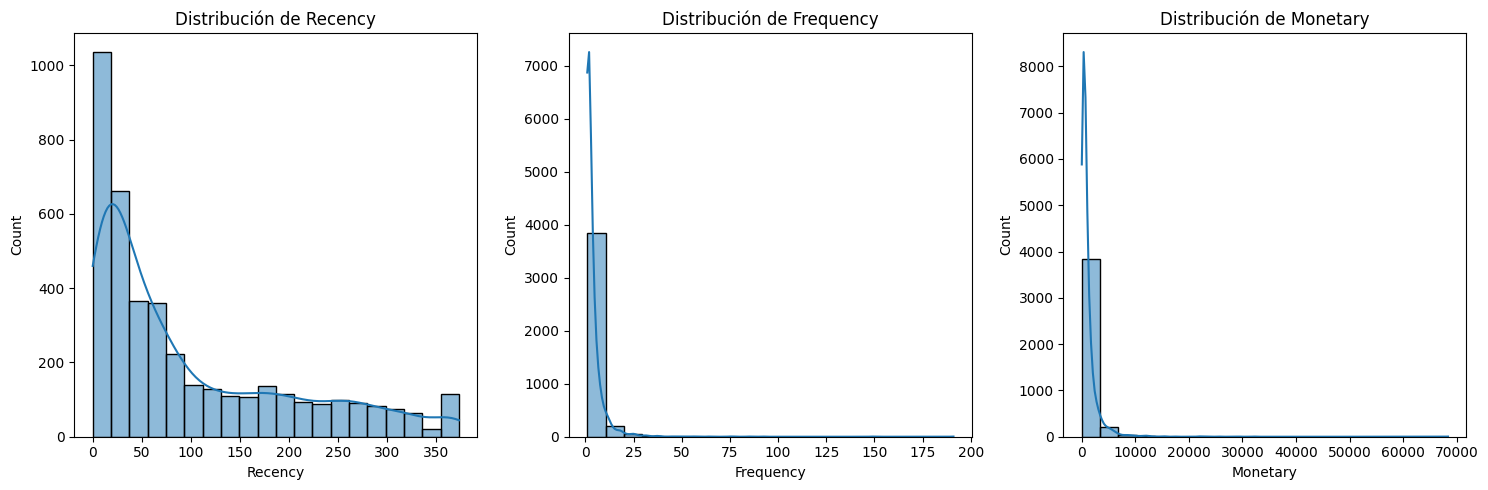

In [10]:


# Histogramas de las variables RFM
plt.figure(figsize=(15, 5))
for i, feature in enumerate(['Recency', 'Frequency', 'Monetary'], 1):
    plt.subplot(1, 3, i)
    sns.histplot(rfm_data[feature], bins=20, kde=True)
    plt.title(f'Distribución de {feature}')
plt.tight_layout()
plt.show()


In [11]:
# Realizaremos una segmentación de clientes en base a las variables RFM que han sido creadas

# Paso 1: Etiquetado de los clientes
# Definir los cuartiles para cada métrica
quantiles = rfm_data.quantile(q=[0.25, 0.50, 0.75])
quantiles = quantiles.to_dict()

# Funciones para asignar etiquetas basadas en cuartiles
def R_Score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

def FM_Score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

# Asignar las etiquetas a nuestro DataFrame
rfm_data['R_Quartile'] = rfm_data['Recency'].apply(R_Score, args=('Recency', quantiles,))
rfm_data['F_Quartile'] = rfm_data['Frequency'].apply(FM_Score, args=('Frequency', quantiles,))
rfm_data['M_Quartile'] = rfm_data['Monetary'].apply(FM_Score, args=('Monetary', quantiles,))

# Paso 2: Creación de segmentos de clientes combinando las etiquetas RFM
rfm_data['RFM_Segment'] = rfm_data.apply(lambda x: str(x['R_Quartile']) + str(x['F_Quartile']) + str(x['M_Quartile']), axis=1)
rfm_data['RFM_Score'] = rfm_data[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)

print(rfm_data.head())

# Clasificar a los clientes por segmentos de RFM Score
rfm_data['General_Segment'] = 'Low-Value'
rfm_data.loc[rfm_data['RFM_Score'] > 3, 'General_Segment'] = 'Mid-Value'
rfm_data.loc[rfm_data['RFM_Score'] > 6, 'General_Segment'] = 'High-Value'

# Mostrar la segmentación de los clientes
print(rfm_data[['RFM_Segment', 'RFM_Score', 'General_Segment']].head())


            Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                     
12347             2          6   3015.68           1           1           1   
12348            75          3    904.44           3           2           2   
12350           310          1    334.40           4           4           3   
12352            36          8   2506.04           2           1           1   
12353           204          1     89.00           4           4           4   

           RFM_Segment  RFM_Score  
CustomerID                         
12347        1.01.01.0          3  
12348        3.02.02.0          7  
12350        4.04.03.0         11  
12352        2.01.01.0          4  
12353        4.04.04.0         12  
           RFM_Segment  RFM_Score General_Segment
CustomerID                                       
12347        1.01.01.0          3       Low-Value
12348        3.02.02.0          7    

Etiquetar a los clientes en base a los cuartiles (1 siendo el mejor, y 4 el peor) para la recencia, para la frecuencia y el monto.


Creamos un segmento RFM concatenando las etiquetas individuales de RFM.
Calculamos un puntaje RFM sumando las etiquetas individuales.


Clasificar a los clientes en segmentos generales basados en su puntaje RFM (por ejemplo, 'High-Value', 'Mid-Value', 'Low-Value').


Si bien esta segmentacion es un poco sensible a outliers, en este caso la limpieza previa deberia ser suficiente para preveer esta limitante.

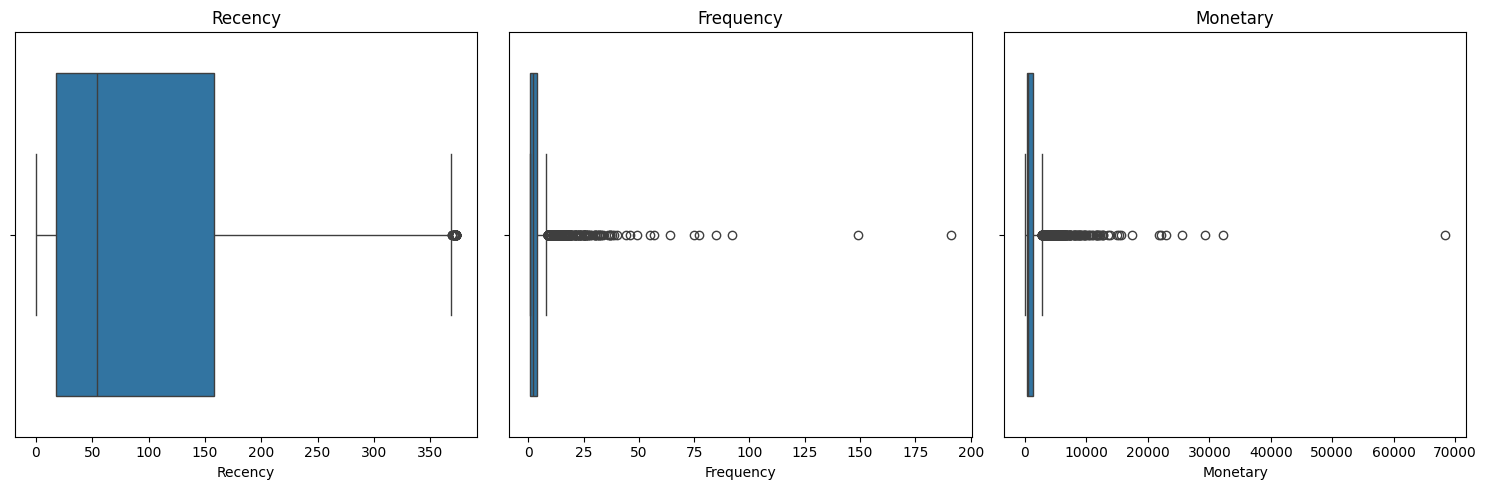

In [12]:


# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency
sns.boxplot(x=rfm_data['Recency'], ax=axes[0])
axes[0].set_title('Recency')

# Plot Frequency
sns.boxplot(x=rfm_data['Frequency'], ax=axes[1])
axes[1].set_title('Frequency')

# Plot Monetary
sns.boxplot(x=rfm_data['Monetary'], ax=axes[2])
axes[2].set_title('Monetary')

# Show the plot
plt.tight_layout()
plt.show()


In [13]:

#Eliminación de outliers
Q1 = rfm_data['Recency'].quantile(0.25)
Q3 = rfm_data['Recency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rfm_data = rfm_data[(rfm_data['Recency'] >= lower_bound) & (rfm_data['Recency'] <= upper_bound)]

Q1 = rfm_data['Frequency'].quantile(0.25)
Q3 = rfm_data['Frequency'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rfm_data = rfm_data[(rfm_data['Frequency'] >= lower_bound) & (rfm_data['Frequency'] <= upper_bound)]

Q1 = rfm_data['Monetary'].quantile(0.25)
Q3 = rfm_data['Monetary'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

rfm_data = rfm_data[(rfm_data['Monetary'] >= lower_bound) & (rfm_data['Monetary'] <= upper_bound)]


In [14]:
print(rfm_data.head())
print(rfm_data[['RFM_Segment', 'RFM_Score', 'General_Segment']].head())

            Recency  Frequency  Monetary  R_Quartile  F_Quartile  M_Quartile  \
CustomerID                                                                     
12348            75          3    904.44           3           2           2   
12350           310          1    334.40           4           4           3   
12353           204          1     89.00           4           4           4   
12355           214          1    459.40           4           4           3   
12356            22          2    539.81           2           3           3   

           RFM_Segment  RFM_Score General_Segment  
CustomerID                                         
12348        3.02.02.0          7      High-Value  
12350        4.04.03.0         11      High-Value  
12353        4.04.04.0         12      High-Value  
12355        4.04.03.0         11      High-Value  
12356        2.03.03.0          8      High-Value  
           RFM_Segment  RFM_Score General_Segment
CustomerID               

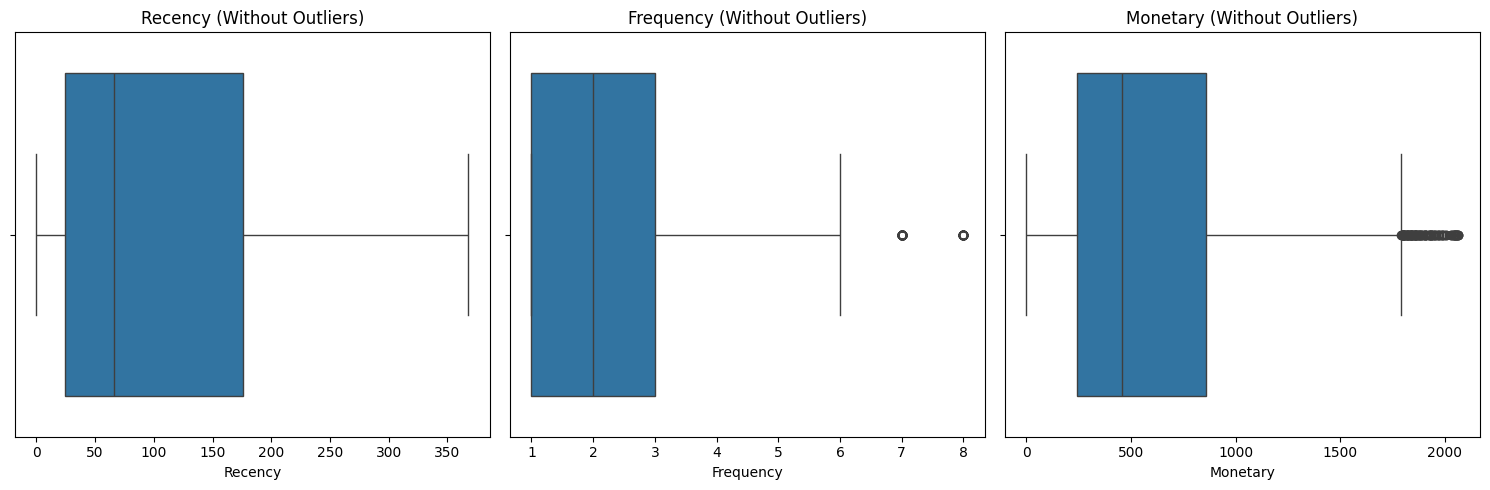

In [15]:


import matplotlib.pyplot as plt
# Create three subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot Recency
sns.boxplot(x=rfm_data['Recency'], ax=axes[0])
axes[0].set_title('Recency (Without Outliers)')

# Plot Frequency
sns.boxplot(x=rfm_data['Frequency'], ax=axes[1])
axes[1].set_title('Frequency (Without Outliers)')

# Plot Monetary
sns.boxplot(x=rfm_data['Monetary'], ax=axes[2])
axes[2].set_title('Monetary (Without Outliers)')

# Show the plot
plt.tight_layout()
plt.show()


Una vez hecha la limpieza de outliers esta completa, procedemos con la pregunta 4:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

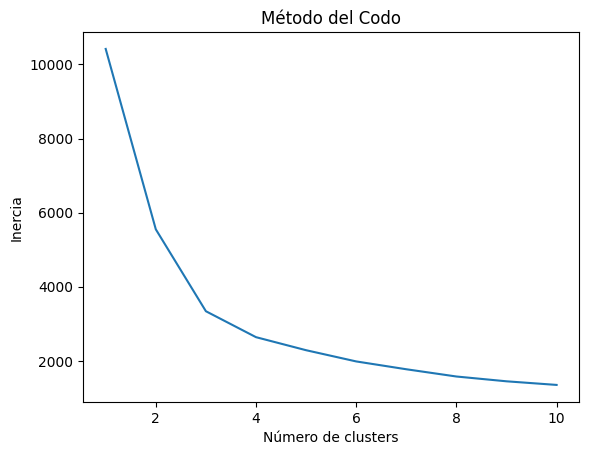

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Normalización de los datos RFM
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Método del codo para encontrar el número óptimo de clusters
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(rfm_normalized)
    sse[k] = kmeans.inertia_  # Suma de las distancias cuadradas a su cluster más cercano

# Gráfico del método del codo
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Número de clusters")
plt.ylabel("Inercia")
plt.title("Método del Codo")
plt.show()


Podemos identificar que el numero de cluster que arroja el metodo del codo estaria entre 3-4, por lo que nos quedaremos con 3 clusters.


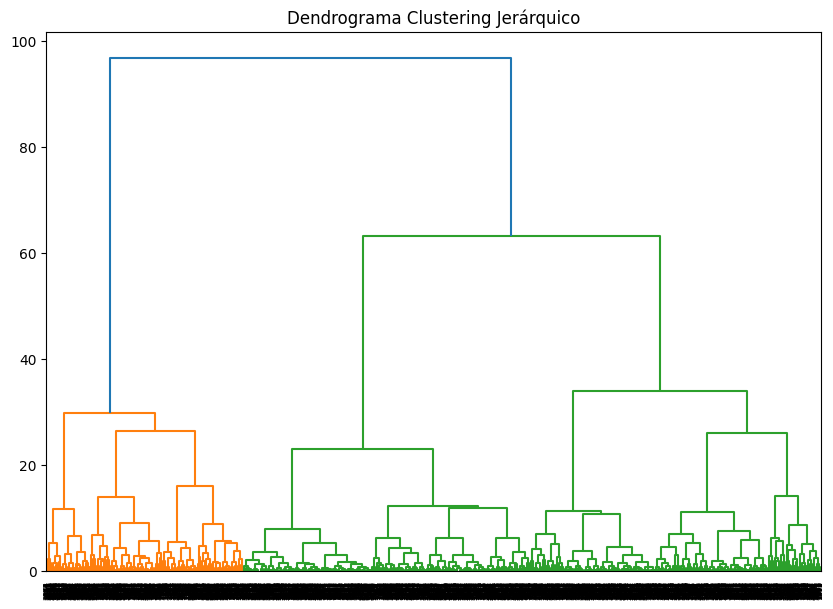

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Clustering jerárquico
linked = linkage(rfm_normalized, 'ward')

# Dendrograma
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrograma Clustering Jerárquico')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


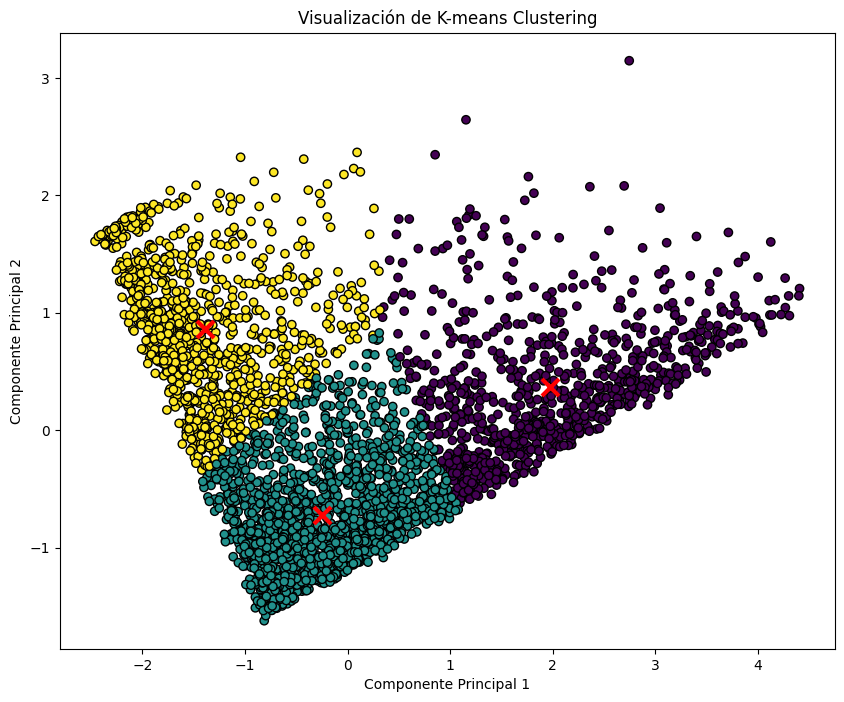

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Normalizar los datos
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'Monetary']])

# Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # Cambia 'n_clusters' a tu número óptimo
clusters = kmeans.fit_predict(rfm_normalized)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
rfm_pca = pca.fit_transform(rfm_normalized)

# Graficar los clusters
plt.figure(figsize=(10, 8))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black')
plt.title('Visualización de K-means Clustering')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Marcar los centroides
centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='r', zorder=10)
plt.show()


In [21]:
import numpy as np
# Calcula las cargas de las componentes principales
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Visualiza las cargas en un DataFrame para mejor interpretación
loadings_df = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=['Recency', 'Frequency', 'Monetary'])
print(loadings_df)


                PC1       PC2
Recency   -0.642608  0.765723
Frequency  0.896448  0.238484
Monetary   0.878366  0.316806


In [22]:
# Mostrar la varianza explicada por cada componente principal
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.66250637 0.24778585]
Varianza total explicada: 0.9102922211077731


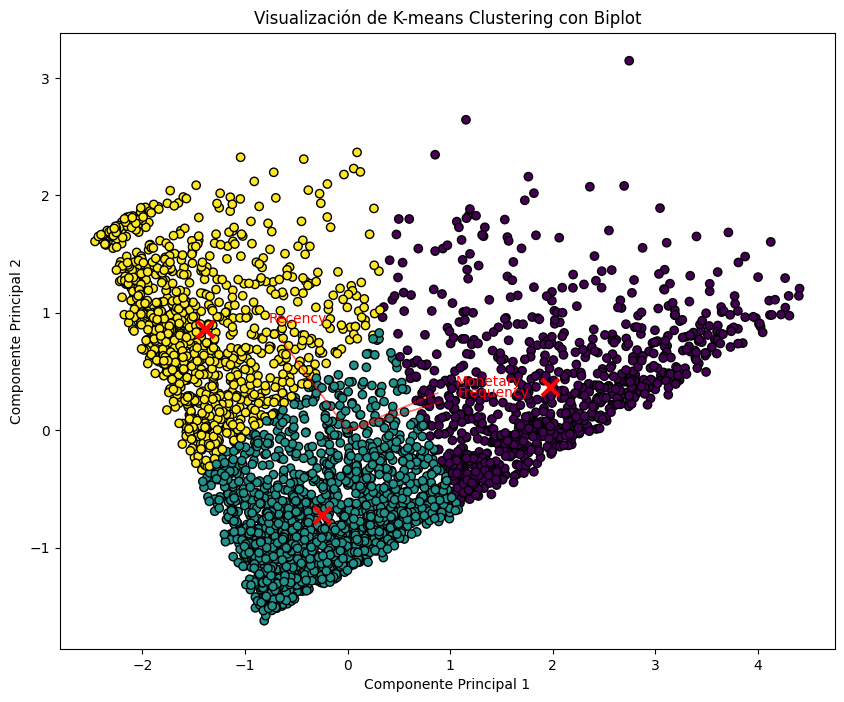

In [23]:
plt.figure(figsize=(10, 8))
plt.scatter(rfm_pca[:, 0], rfm_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Visualización de K-means Clustering con Biplot')

# Agregar los vectores de las cargas para cada variable original
for i, var_names in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
    plt.text(loadings[i, 0]*1.2, loadings[i, 1]*1.2, var_names, color='r')

# Mostrar centroides
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='x', s=150, linewidths=3, color='r', zorder=10)
plt.show()


La separación entre los clusters puede indicar qué tan distintos son los grupos entre sí. En este gráfico, parece haber una buena separación, lo que sugiere que los clusters representan segmentos de clientes bastante diferentes.



In [ ]:
# Pregunta 5:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Calculamos el coeficiente de silueta para cada punto
silhouette_scores = silhouette_score(rfm_normalized, clusters)

print("Coeficiente de silueta promedio:", silhouette_scores)




Coeficiente de silueta promedio: 0.4205061529768836


un valor promedio de silueta de 0.428 sugiere que los clústeres están razonablemente bien definidos y separados. No es un valor extremadamente alto, pero es positivo y está más cerca de 1 que de 0, lo que indica que, en promedio, los clústeres están más separados que solapados y que los puntos tienden a estar más cerca de los otros puntos en su mismo clúster que de puntos en otros clústeres. Esto se puede considerar como una señal de que la calidad del agrupamiento es moderadamente buena.

VIPs o Ballenas (Whales): Este segmento podría representar a los clientes que gastan mucho (alto valor monetario), compran con frecuencia (alta frecuencia) y han realizado una compra recientemente (baja recency). Son los clientes más valiosos.


Clientes Leales o Aficionados (Loyalists): Podrían ser aquellos con compras frecuentes y recientes pero con un valor monetario no necesariamente alto. Son regulares y comprometidos con la marca o empresa

Clientes Potenciales o Novatos (Rising Stars): Estos clientes han hecho una compra reciente y han gastado una buena cantidad de dinero, pero no han comprado tan frecuentemente. Pueden ser nuevos clientes que muestran un gran potencial.

Clientes Adormecidos o en Riesgo (Sleeping or At Risk): Aquellos que anteriormente compraban con frecuencia y/o gastaban mucho, pero ha pasado mucho tiempo desde su última compra.

Clientes Casuales o de Una Vez (Casual or One-timers): Los que tienen baja frecuencia y bajo valor monetario, quizás hicieron una sola compra o compras muy esporádicas.

Clientes Perdidos o Desaparecidos (Lost or Churned): Han pasado mucho tiempo desde su última compra, incluso si en el pasado compraron con frecuencia o gastaron mucho.